In [27]:
import numpy as np
import matplotlib.pyplot as plt
major_urls = ["scos.skku", "liberalarts.skku", "law.skku", "sscience.skku", "ecostat.skku",
              "biz.skku", "coe.skku", "art.skku", "cscience.skku", "icc.skku", "cs.skku",
              "shb.skku", "pharm.skku", "biotech.skku", "sport.skku", "skkumed.skku", "icon.skku"]

major_names = ['유학', '문과', '법과', '사회과학', '경제', '경영', '사범', '예술', '자연과학', '정보통신', '소프트웨어', '공과', '약학', '생명공학', '스포츠과학',
               '의과', '융합']



In [79]:
def pearson_similarity(vector1, vector2):
    return np.corrcoef(vector1, vector2)[0][1]

def cosine_similarity(vector1, vector2):
    vector1_len = np.linalg.norm(vector1)
    vector2_len = np.linalg.norm(vector2)

    return np.dot(vector1, vector2) / (vector1_len * vector2_len)

def if_letters_in_content(letters, content):
    if any(s in content for s in letters):
        return True
    return False

In [29]:
class Curation:
    def __init__(self, _content):
        self.belong_label = np.zeros(29, dtype=np.float32)
        self.property_label = np.zeros(9, dtype=np.float32)
        self.content = _content
        self.url = _content.split(" ")[0]

        self.labelling_major()
        self.labelling_semester()
        self.labelling_attend()

        self.labeling_scholarship()
        self.labelling_contest()
        self.labelling_graduated()
        self.labelling_job()
        self.labelling_intern()
        self.labelling_schedule()
        self.labelling_lecture()
        self.labelling_etc()

    def labelling_major(self):
        # [1] url 링크로 소속 전공 판별
        for i, major in enumerate(major_urls, 0):
            if major in self.url:
                self.belong_label[i] = 1
                break

        # [2] 글 내용으로 판별

    def labelling_semester(self):
        letters = ("hakbu.skku", "1학년", "신입생", "새내기", "전공진입", "전공 진입")
        if if_letters_in_content(letters, self.content):
            self.belong_label[17] = 1
            self.belong_label[18] = 1

        letters = ("2학년", "3학기", "4학기")
        if if_letters_in_content(letters, self.content):
            self.belong_label[19] = 1
            self.belong_label[20] = 1

        letters = ("3학년", "5학기", "6학기", "편입")
        if if_letters_in_content(letters, self.content):
            self.belong_label[21] = 1
            self.belong_label[22] = 1

        letters = ("졸업", "4학년", "7학기", "8학기")
        if if_letters_in_content(letters, self.content):
            self.belong_label[23] = 1
            self.belong_label[24] = 1

        letters = ("초과 학기", "초과학기", "졸업유예", "졸업 유예", "수료")
        if if_letters_in_content(letters, self.content):
            self.belong_label[25] = 1

    def labelling_attend(self):
        if "졸업" in self.content:
            self.belong_label[26] = 1
            self.belong_label[28] = 1
        elif "복학" in self.content:
            self.belong_label[27] = 1
        else:
            pass

    def labeling_scholarship(self):
        letters = ("장학", "재단", "대출", "학자금")
        if if_letters_in_content(letters, self.content):
            self.property_label[0] = 1

    def labelling_contest(self):
        letters = ("대회", "캠프", "경진", "창업", "페스티벌", "아이디어", "봉사", "참가", "공모", "대외활동")
        if if_letters_in_content(letters, self.content):
            self.property_label[1] = 1

    def labelling_graduated(self):
        letters = ("대학원", "석사", "박사", "석박", "학석")
        if if_letters_in_content(letters, self.content):
            self.property_label[2] = 1

    def labelling_job(self):
        letters = ("취업", "채용", "공채", "특채", "경력")
        if if_letters_in_content(letters, self.content):
            self.property_label[3] = 1

    def labelling_intern(self):
        letters = ("채용형", "인턴", "intern")
        if if_letters_in_content(letters, self.content):
            self.property_label[4] = 1

    def labelling_schedule(self):
        letters = ("신청", "일정", "복학", "기간", "강의평가", "기한", "학사", "수강신청", "졸업")
        if if_letters_in_content(letters, self.content):
            self.property_label[5] = 1

    def labelling_lecture(self):
        letters = ("특강", "설명회", "세미나", "콜로키움", "발표", "박람회")
        if if_letters_in_content(letters, self.content):
            self.property_label[6] = 1

    def labelling_exchangeself(self):
        letters = ("교환학생", "수학생", "파견", "유학")
        if if_letters_in_content(letters, self.content):
            self.property_label[7] = 1

    def labelling_etc(self):
        for item in self.property_label:
            if item == 1:
                return
        self.property_label[8] = 1


In [87]:
# belong [1학기, 2학기, 3학기, 4학기, 5학기, 6학기, 7학기, 8학기, 초과학기] 17~25
# property [장학금, 대외활동, 대학원, 취업, 인턴, 학사일정, 특강, 교환학생, 기타] 0~8
class User:
    def __init__(self, _majors, _semester, _attend):
        self.belong_label = np.zeros(29, dtype=np.float32)
        self.property_label = np.zeros(9, dtype=np.float32)

        self.majors = _majors
        self.semester = int(_semester)
        self.attend = _attend

        self.labelling_major()
        self.labelling_semester()
        self.labelling_attend()

        self.labeling_property()

    def labelling_major(self):
        for major in self.majors:
            for name in major_names:
                if name in major:
                    self.belong_label[major_names.index(name)] = 1

    def labelling_semester(self):
        if self.semester <= 8 and self.semester >= 1:
            self.belong_label[int(self.semester) + 16] = 1
        else:
            self.belong_label[25] = 1

    def labelling_attend(self):
        if self.attend == '예':
            self.belong_label[26] = 1
        elif self.attend == '아니오':
            self.belong_label[27] = 1

        if self.semester >= 7:
            self.belong_label[28] = 1

    def labeling_property(self):
        # 1학년
        if self.semester == 1 or self.semester == 2:
            self.property_label[5] = 1
            self.property_label[8] = 1
        # 2학년
        elif self.semester == 3 or self.semester == 4:
            self.property_label[0] = 1
            self.property_label[1] = 1
            self.property_label[5] = 1
            self.property_label[6] = 1
        # 3학년
        elif self.semester == 5 or self.semester == 6:
            self.property_label[0] = 1
            self.property_label[1] = 1
            self.property_label[5] = 1
            self.property_label[6] = 1
            self.property_label[7] = 1
        # 4학년
        elif self.semester == 7 or self.semester == 8:
            self.property_label[2] = 1
            self.property_label[3] = 1
            self.property_label[4] = 1
            self.property_label[5] = 1

        else:
            self.property_label[3] = 1
            self.property_label[4] = 1
            self.property_label[5] = 1


In [88]:
fr = open('../data.txt', 'r', encoding='utf-8')
data_lines = fr.readlines()
curations = []
for line in data_lines:
    curation = Curation(line)
    curations.append(curation)
fr.close()

In [89]:
fr = open('users', 'r')
user_lines = fr.readlines()
users = []
for line in user_lines:
    content = line.split(" ")
    user_majors = []
    user_majors.append(content[0])
    if content[1].isdigit() == False:
        user_majors.append(content[1])
        user_semester = content[2]
        if content[3] == '재학':
            user_attend = '예'
        else:
            user_attend = '아니오'
    else:
        user_semester = content[1]
        if content[2] == '재학':
            user_attend = '예'
        else:
            user_attend = '아니오'

    user = User(user_majors, user_semester, user_attend)
    users.append(user)
fr.close()


In [90]:
user_num = len(users)
curation_num = len(curations)

print((user_num, curation_num))
# print(user)

print(users[0].property_label)

(10, 13029)
[0. 0. 1. 1. 1. 1. 0. 0. 0.]


In [91]:
similarity_matrix = np.zeros((user_num, curation_num), dtype=np.float32)
print(similarity_matrix.shape)
i = 0
j = 0
for user in users:
    for curation in curations:
        similarity_matrix[i][j] = cosine_similarity(np.concatenate((user.belong_label, user.property_label)),
                                                     np.concatenate((curation.belong_label, curation.property_label)))
#         similarity_matrix[i][j] = cosine_similarity(np.concatenate((user.belong_label, user.property_label)),
#                                                      np.concatenate((curation.belong_label, curation.property_label)))
        j = j + 1
    j = 0
    i = i + 1

(10, 13029)


In [92]:
for i in range(0, user_num):
    for j in range(0, curation_num):
        score = similarity_matrix[i][j]
        if score > 0.75:
            print("user : {} , curation : {}, score : {}, text : {} ".format(i + 1, j + 1, similarity_matrix[i][j], data_lines[j][14:40]))

user : 1 , curation : 4482, score : 0.7777777910232544, text : 2016년 하반기 대졸신입/인턴 공개모집(~9/ 
user : 2 , curation : 4482, score : 0.7777777910232544, text : 2016년 하반기 대졸신입/인턴 공개모집(~9/ 
user : 3 , curation : 12910, score : 0.7559289336204529, text : [장학]2016 홀트장학생 추천 | 2016 홀 
user : 4 , curation : 1664, score : 0.7559289932250977, text :  2016 동화약품㈜ 글로벌 인턴 모집(중국유학 
user : 4 , curation : 1858, score : 0.7559289932250977, text :  | [더존비즈온] 인턴연계 신입사원 모집 (추 
user : 4 , curation : 3738, score : 0.7559289932250977, text :  [자과캠] 국제교류팀 인턴 모집 | 성균관대학 
user : 4 , curation : 7918, score : 0.7559289932250977, text :  [자과캠] 국제처 인턴 1명 모집 ( ~2.9 
user : 4 , curation : 11706, score : 0.7559289932250977, text :  한국수출입은행 장애인 청년인턴 모집 | 한국수 
user : 5 , curation : 181, score : 0.7745966911315918, text : edu | 복학생 수강신청 기간안내 | 2009 
user : 5 , curation : 883, score : 0.800000011920929, text : edu | 2007학년도 2학기 복수전공 신청  
user : 5 , curation : 2463, score : 0.7745966911315918, text : edu | 복학생 등록 및 수강신청 안내 | 복 


In [71]:
for i, score in enumerate(similarity_matrix[9]):
    if score > 0.4:
        print("user : {} , curation : {}, score : {}, text : {} ".format(10, i + 1, score, data_lines[i + 1][12:40]))
    

user : 10 , curation : 135, score : 0.4634396731853485, text :  | MOS 자격증시험 및 교육반 일정 | 본교 창 
user : 10 , curation : 315, score : 0.4634396731853485, text : u.edu | 2016학년도 1학기 자연과학대학 동 
user : 10 , curation : 487, score : 0.4634396731853485, text :  | 2014학년도 1학기 인문사회과학 캠퍼스 운동 
user : 10 , curation : 1403, score : 0.4634396731853485, text : | 2017 후기 일반대학원 수시전형 모집안내 |  
user : 10 , curation : 2121, score : 0.4634396731853485, text : du | 새내기 약사들을 위한 G-약료 프로젝트 교 
user : 10 , curation : 2223, score : 0.4634396731853485, text :  | [자과캠]성균인을 위한 히든챔피언 행사 안내  
user : 10 , curation : 2776, score : 0.4634396731853485, text :  | SSK [네트워크 시대의 민주주의와 사회통합] 
user : 10 , curation : 2936, score : 0.4634396731853485, text :  | 2015.2학기 교직복수전공 신청 안내 | 
 
user : 10 , curation : 3198, score : 0.4634396731853485, text :  | 방중 창의품 관련 교육일정중 컴활 1급 일정  
user : 10 , curation : 3428, score : 0.4634396731853485, text : du | 2011학년도 2학기 휴학/복학/재입학/복 
user : 10 , curation : 3493, score : 0.4634396731853485, text :

In [70]:
similarity_matrix[9].max()

0.46343967

0.23646247
max : 0.8660253882408142


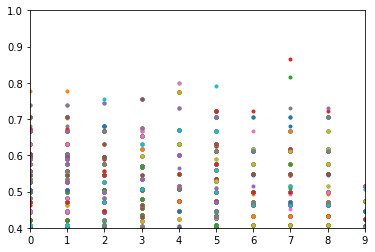

In [82]:
np.set_printoptions(threshold=np.nan)
print(similarity_matrix.mean())
similarity_matrix_1d = similarity_matrix.reshape(user_num*curation_num)
print("max : {}".format(similarity_matrix_1d.max()))
# print(similarity_matrix_1d)
plt.plot(similarity_matrix, '.')
plt.axis([0, 9, 0.4, 1])
plt.show()

In [78]:
similarity_matrix[5][180]

0.32756922